In [5]:
### Introduction
""" The goal of this project is to analyze vital fetal indicators using Cardiotocogram (CTG) data to classify fetal health into three categories:
     Normal, Suspect, and Pathological. 
Predictive models can help medical professionals intervene early to prevent maternal and infant mortality. """

' The goal of this project is to analyze vital fetal indicators using Cardiotocogram (CTG) data to classify fetal health into three categories:\n     Normal, Suspect, and Pathological. \nPredictive models can help medical professionals intervene early to prevent maternal and infant mortality. '

In [35]:
import pandas as pd
df = pd.read_csv('/home/ignatiusvmk/Downloads/foetal_health_data.csv')

In [36]:
# Inspect the first few rows (10)
df.head(10)

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3
6,134,0.001,0.0,0.013,0.008,0.0,0.003,29,6.3,0,...,50,200,6,3,71,107,106,215,0,3
7,122,0.000,0.0,0.000,0.000,0.0,0.000,83,0.5,6,...,62,130,0,0,122,122,123,3,1,3
8,122,0.000,0.0,0.002,0.000,0.0,0.000,84,0.5,5,...,62,130,0,0,122,122,123,3,1,3
9,122,0.000,0.0,0.003,0.000,0.0,0.000,86,0.3,6,...,62,130,1,0,122,122,123,1,1,3


In [37]:
#Check for any missing values and summarize total number
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [38]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [39]:
#summary statistics for each column
df.describe()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [40]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_6359/1135324925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['fetal_health'], palette="viridis")


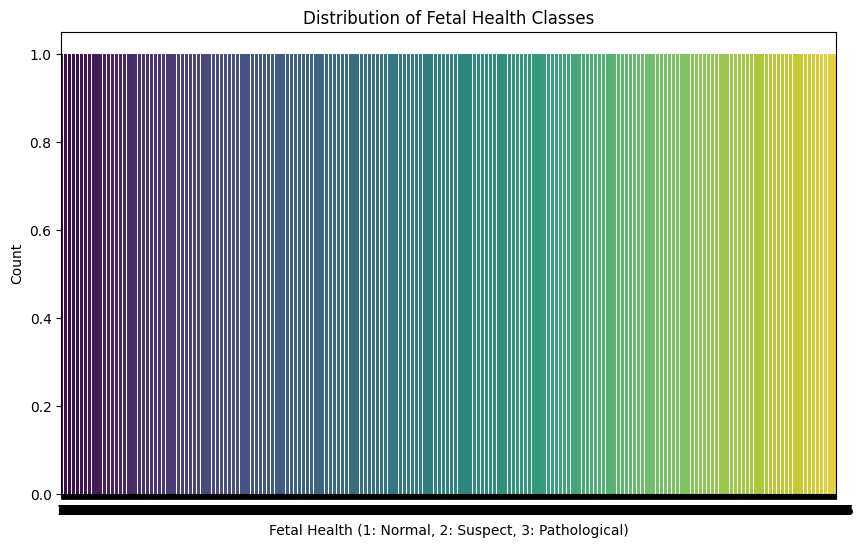

In [41]:
# Set up the figure size for better readability
plt.figure(figsize=(10, 6))

# Count plot of the fetal health classes
sns.countplot(df['fetal_health'], palette="viridis")
plt.title('Distribution of Fetal Health Classes')
plt.xlabel('Fetal Health (1: Normal, 2: Suspect, 3: Pathological)')
plt.ylabel('Count')
plt.show()

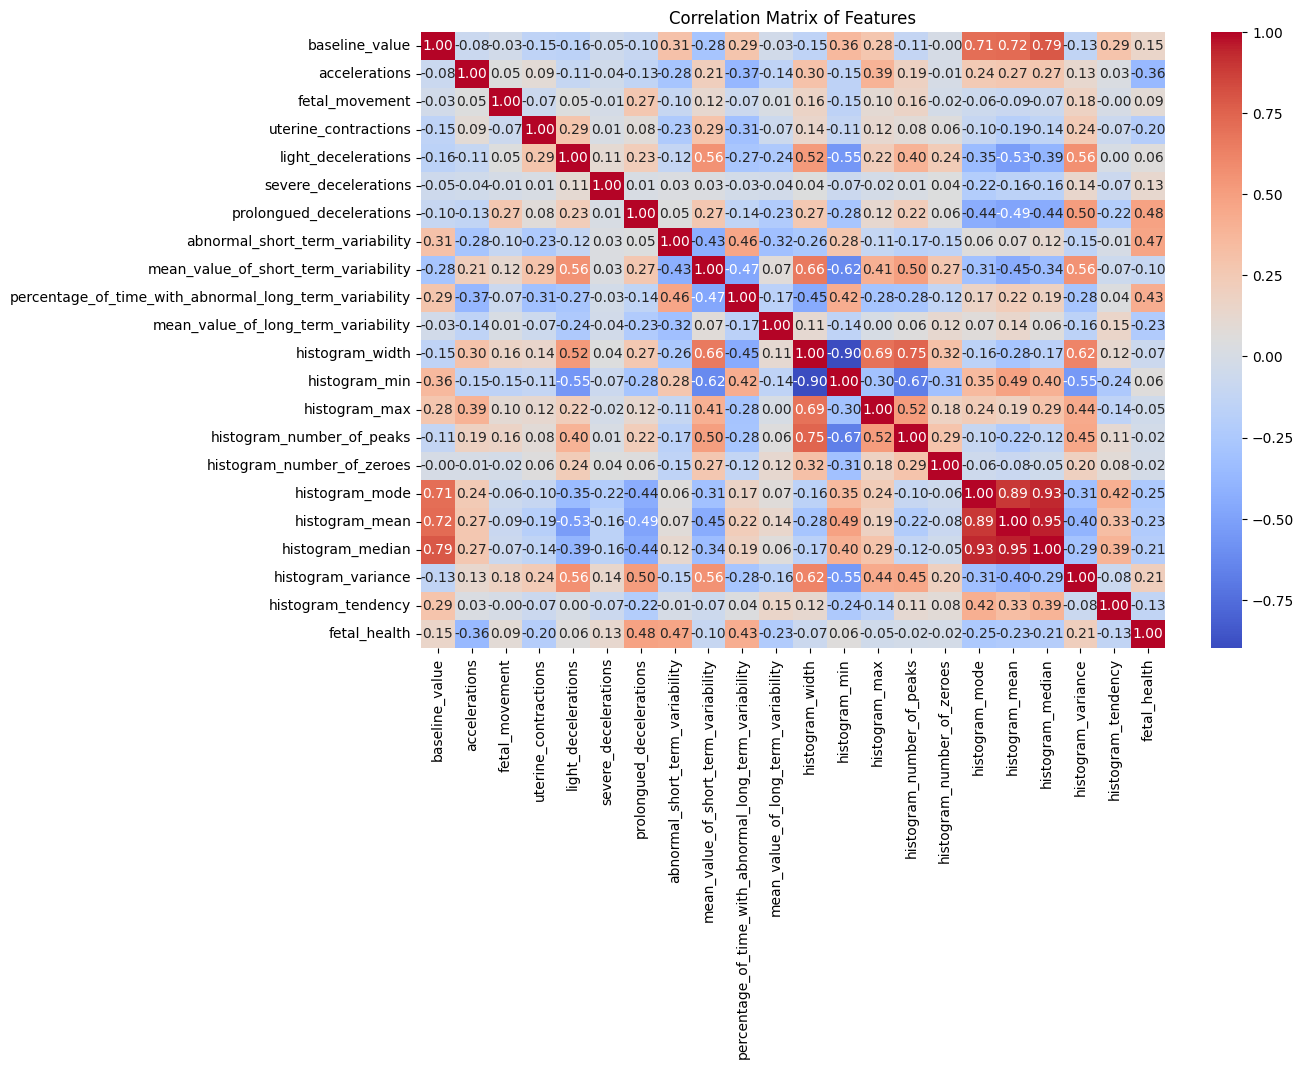

In [42]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [43]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Define features (X) and target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Make predictions
y_pred = model.predict(X_test)

In [76]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[487   7   2]
 [ 21  77   3]
 [  2   1  38]]
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       496
           2       0.91      0.76      0.83       101
           3       0.88      0.93      0.90        41

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



In [49]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


In [50]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [51]:
# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [52]:
# Best parameters and evaluation
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


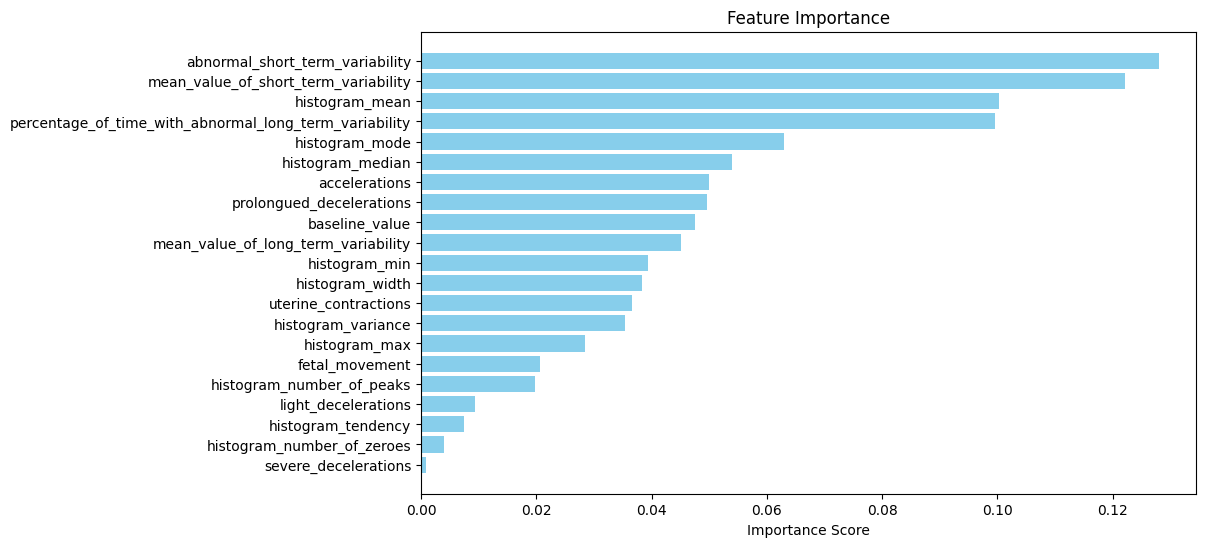

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
### Conclusion
""" The Random Forest model achieved a high accuracy of 94% in predicting fetal health based on CTG data.
The most important features were [mention top features like accelerations, fetal movement, etc.].
This model can potentially be integrated into clinical settings to assist in fetal health monitoring and early interventions."""